![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Construcción e implementación de árboles de decisión y métodos de ensamblaje

En este taller podrá poner en práctica los sus conocimientos sobre construcción e implementación de árboles de decisión y métodos de ensamblajes. El taller está constituido por 9 puntos, 5 relacionados con árboles de decisión (parte A) y 4 con métodos de ensamblaje (parte B). probando

## Parte A - Árboles de decisión

En esta parte del taller se usará el conjunto de datos de Capital Bikeshare de Kaggle, donde cada observación representa el alquiler de una bicicleta durante una hora y día determinado. Para más detalles puede visitar los siguientes enlaces: [datos](https://github.com/justmarkham/DAT8/blob/master/data/bikeshare.csv), [dicccionario de datos](https://www.kaggle.com/c/bike-sharing-demand/data).

## Descripción de las variables

Bike sharing systems are a means of renting bicycles where the process of obtaining membership, rental, and bike return is automated via a network of kiosk locations throughout a city. Using these systems, people are able rent a bike from a one location and return it to a different place on an as-needed basis. Currently, there are over 500 bike-sharing programs around the world.

The data generated by these systems makes them attractive for researchers because the duration of travel, departure location, arrival location, and time elapsed is explicitly recorded. Bike sharing systems therefore function as a sensor network, which can be used for studying mobility in a city. In this competition, participants are asked to combine historical usage patterns with weather data in order to forecast bike rental demand in the Capital Bikeshare program in Washington, D.C.
datetime - hourly date + timestamp

season -  1 = spring, 2 = summer, 3 = fall, 4 = winter 

holiday - whether the day is considered a holiday

workingday - whether the day is neither a weekend nor holiday

weather - 1: Clear, Few clouds, Partly cloudy, Partly cloudy

2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist

3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds

4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 

temp - temperature in Celsius

atemp - "feels like" temperature in Celsius

humidity - relative humidity

windspeed - wind speed

casual - number of non-registered user rentals initiated

registered - number of registered user rentals initiated

count - number of total rentals

### Datos prestamo de bicicletas

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importación de librerías
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from matplotlib import pyplot as plt
import seaborn as sns



In [3]:
# Lectura de la información de archivo .csv
bikes = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/bikeshare.csv', index_col='datetime', parse_dates=True)
# Renombrar variable "count" a "total"
bikes.rename(columns={'count':'total'}, inplace=True)
# Crear la hora como una variable 
bikes['hour'] = bikes.index.hour
# Visualización
bikes.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,hour
datetime,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4


### Punto 1 - Análisis descriptivo

Ejecute las celdas 1.1 y 1.2. A partir de los resultados realice un análisis descriptivo sobre las variables hour y workingday, escriba sus inferencias sobre los datos. Para complementar su análisis puede usar métricas como máximo, mínimo, percentiles entre otros.

In [4]:
# Celda 1.1
print(bikes.groupby('workingday').total.mean())

print(bikes.groupby('hour').total.mean())

workingday
0    188.506621
1    193.011873
Name: total, dtype: float64
hour
0      55.138462
1      33.859031
2      22.899554
3      11.757506
4       6.407240
5      19.767699
6      76.259341
7     213.116484
8     362.769231
9     221.780220
10    175.092308
11    210.674725
12    256.508772
13    257.787281
14    243.442982
15    254.298246
16    316.372807
17    468.765351
18    430.859649
19    315.278509
20    228.517544
21    173.370614
22    133.576754
23     89.508772
Name: total, dtype: float64


Los tipos de datos de las variables del dataset son:
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
total           int64
hour            int64
dtype: object
 
Descripción de las variables del Dataset:
              count        mean         std   min      25%      50%       75%  \
season      10886.0    2.506614    1.116174  1.00   2.0000    3.000    4.0000   
holiday     10886.0    0.028569    0.166599  0.00   0.0000    0.000    0.0000   
workingday  10886.0    0.680875    0.466159  0.00   0.0000    1.000    1.0000   
weather     10886.0    1.418427    0.633839  1.00   1.0000    1.000    2.0000   
temp        10886.0   20.230860    7.791590  0.82  13.9400   20.500   26.2400   
atemp       10886.0   23.655084    8.474601  0.76  16.6650   24.240   31.0600   
humidity    10886.0   61.886460   19.245033  0.00  47.0000

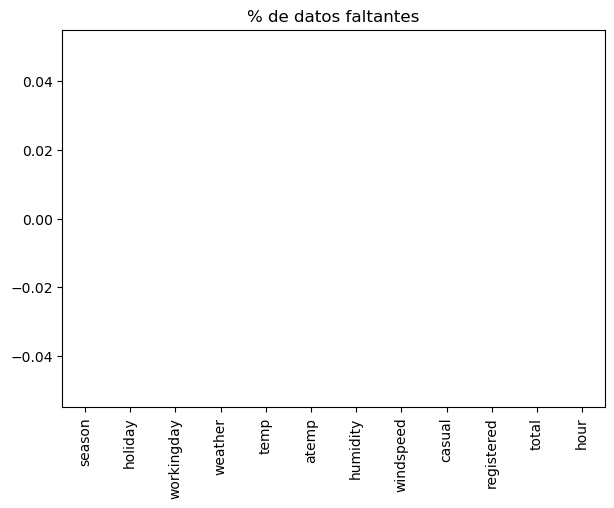

Empty DataFrame
Columns: [season, holiday, workingday, weather, temp, atemp, humidity, windspeed, casual, registered, total, hour]
Index: []


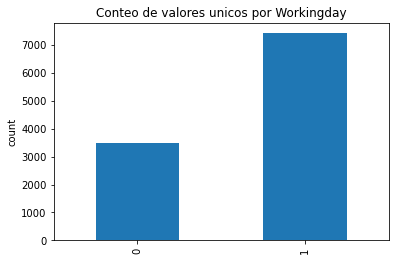

Proporción de desbalance

1    68.087452
0    31.912548
Name: workingday, dtype: float64


In [5]:
#Análisis descriptivo del Dataset bikes

# función para calcular el % de datos faltantes
def porcentaje_faltantes(df:pd.DataFrame)->pd.DataFrame:
  temp= 100* df.isnull().sum() / len(df)
  return temp[temp >= 0].sort_values()

#función para calcular el % de completitud
def porcentaje_completitud(df:pd.DataFrame)->float:
  suma_nan= sum(df.isnull().sum())
  porcentaje_nan= 100*suma_nan/(df.shape[0]*df.shape[1])
  return (100- porcentaje_nan)

#==============================================================================================================
#Tipo de datos de las variables del dataset
print
print('\033[1m' + 'Los tipos de datos de las variables del dataset son:' + '\033[0m')
print(bikes.dtypes)

#==============================================================================================================
#Definición de las variables categóricas y numéricas
features_categoricas = []
label='workingday'
features_numericas = [x for x in bikes.columns if x not in features_categoricas+[label]]

#==============================================================================================================

#Descripción de los datos
print(' ')
print('\033[1m' + 'Descripción de las variables del Dataset:' + '\033[0m')
print(bikes.describe().T)

#Conteo de datos faltantes
print(f'\nConteo nominal total de datos faltantes\n{bikes.isnull().sum().sort_values()}')
print(f'\n% Completitud: {porcentaje_completitud(bikes)}')
missing= porcentaje_faltantes(bikes)
print(f'\nConteo porcentual total de datos faltantes\n{missing}')
print(f'\n')

plt.figure(figsize=(7, 5),dpi=100)
sns.barplot(x=missing.index, y=missing)
plt.xticks(rotation=90);
plt.title('% de datos faltantes')
plt.show()

#Investigar si hay filas completas con datos faltasntes.
print(bikes[bikes[features_numericas + features_categoricas].isnull().all(1)])

#Ploteando los valores unicos de la variable Clase
bikes[label].value_counts().sort_values().plot(kind='bar', rot=0, ylabel='count')
plt.title('Conteo de valores unicos por Workingday')
plt.xticks(rotation=90);
plt.show()
print(f'Proporción de desbalance\n')
print(100*bikes[label].value_counts()/bikes[label].value_counts().sum())

In [6]:
# Celda 1.2
bikes.groupby('hour').total.mean()

hour
0      55.138462
1      33.859031
2      22.899554
3      11.757506
4       6.407240
5      19.767699
6      76.259341
7     213.116484
8     362.769231
9     221.780220
10    175.092308
11    210.674725
12    256.508772
13    257.787281
14    243.442982
15    254.298246
16    316.372807
17    468.765351
18    430.859649
19    315.278509
20    228.517544
21    173.370614
22    133.576754
23     89.508772
Name: total, dtype: float64

### Punto 1-  Análisis 
***

A pesar de que  68.08% de los días en que se rentaron bicicletas son días laborales, el promedio de bicletas rentas en día laboral y en los que no, es casi el mismo 193.01 y 188.50, respectivamente, lo que indica que en un día no laboral, la renta de bicicletas es mayor. 
Respecto a los horarios, se puede apreciar que de 6 a 7 de la mañana hay un aumento de renta de bicicletas, e promedio de 76.25 a 213.11 bicicletas, esto se relaciona con los habitos de trabajo de las personas ya que es muy posible que utilicen para el desplazamiento a sus sitios laborales.



### Punto 2 - Análisis de gráficos

Primero ejecute la celda 2.1 y asegúrese de comprender el código y el resultado. Luego, en cada una de celdas 2.2 y 2.3 escriba un código que genere una gráfica de las rentas promedio por hora cuando la variable "workingday" es igual a 0 e igual a 1, respectivamente. Analice y escriba sus hallazgos.

<AxesSubplot:xlabel='hour', ylabel='Workingday =1'>

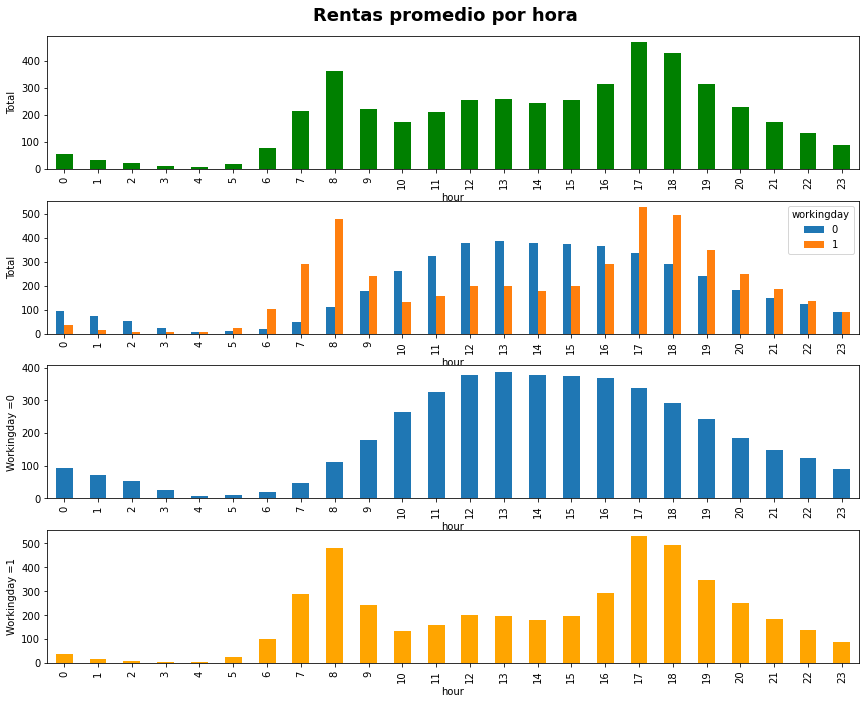

In [7]:
# Celda 2.1 - rentas promedio para cada valor de la variable "hour"
#bikes.groupby('hour').total.mean().plot()

fig, axes = plt.subplots(4,1, figsize=(12,10))
fig.subplots_adjust(top=1.5)
fig.suptitle('Rentas promedio por hora',fontsize=18,fontweight ="bold",color="black")
plt.tight_layout(rect=[0, 0.03, 1, 1])
ax = axes.ravel() 

rentas_por_hora=bikes.groupby('hour').total.mean()
rentas_por_hora.plot(kind='bar', stacked=False,ax=ax[0],color="g",ylabel='Total')

rentas_por_hora2=bikes.groupby(['hour','workingday']).total.mean().unstack()
rentas_por_hora2.plot(kind='bar', stacked=False,ax=ax[1],ylabel='Total')

bikes_w_0=bikes[bikes['workingday'].isin([0])]
rentas_por_hora_w_0=bikes_w_0.groupby('hour').total.mean()
rentas_por_hora_w_0.plot(kind='bar', stacked=True,ax=ax[2],ylabel='Workingday =0')


bikes_w_1=bikes[bikes['workingday'].isin([1])]
rentas_por_hora_w_1=bikes_w_1.groupby('hour').total.mean()
rentas_por_hora_w_1.plot(kind='bar', stacked=True,ax=ax[3],color="orange",ylabel='Workingday =1')


<AxesSubplot:xlabel='hour'>

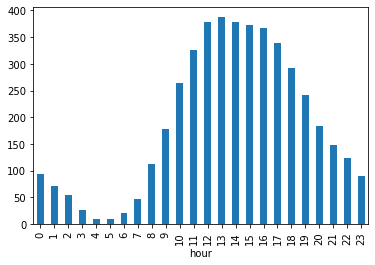

In [8]:
# Celda 2.2 - "workingday"=0 escriba su código y hallazgos 
bikes_w_0=bikes[bikes['workingday'].isin([0])]
#bikes_w_0.groupby('hour').total.mean().plot()
rentas_por_hora_w_0=bikes_w_0.groupby('hour').total.mean()
rentas_por_hora_w_0.plot(kind='bar', stacked=True)

<AxesSubplot:xlabel='hour'>

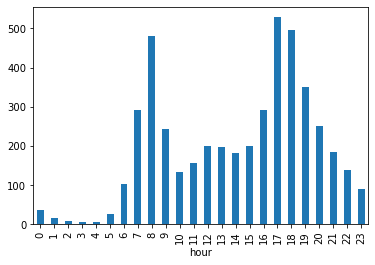

In [9]:
# Celda 2.3 - "workingday"=1 escriba su código y hallazgos 
bikes_w_1=bikes[bikes['workingday'].isin([1])]
#rentas_por_hora_w_o=bikes_w_0.groupby('hour').total.mean().plot()
rentas_por_hora_w_1=bikes_w_1.groupby('hour').total.mean()
rentas_por_hora_w_1.plot(kind='bar', stacked=True)


### Análisis punto 2

En las graficas se observa que en los días hábiles hay dos picos importantes en el día para la renta de bicicletas (de 6 a 9) y (de 17 a 19) y es muy probable que sea porque las personas la utilizan para desplazarse a su trabajo y devolverse en la tarde a sus hogares, sin embargo, este comportamiento es difrente en los días no hábiles ya que la mayor demanda de renta de bicicletas es aproximadamente de 10 a 18, probablemente porque las utiliazn más cómo deporte o recreación.


### Punto 3 - Regresión lineal
En la celda 3 ajuste un modelo de regresión lineal a todo el conjunto de datos, utilizando "total" como variable de respuesta y "hour" y "workingday" como las únicas variables predictoras. Luego, imprima los coeficientes e interprételos. ¿Cuáles son las limitaciones de la regresión lineal en este caso?

 
Resultados del modelo de Regresión Lineal
 
MSE Modelo de Regresión Lineal:27541.255252498402
Media MSE Modelo de Regresión Lineal con CV:28852.95022019151
Standart Deviation MSE:13954.821608376535
Media R2:0.16059115011434855
Coeficientes [10.49206282  4.07248627]
Intercepto 67.70595026191687
 
Total = 10.49*hour + 4.07*workingday + 67.71
 
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.161
Model:                            OLS   Adj. R-squared:                  0.160
Method:                 Least Squares   F-statistic:                     1041.
Date:                Sun, 03 Apr 2022   Prob (F-statistic):               0.00
Time:                        20:54:47   Log-Likelihood:                -71087.
No. Observations:               10885   AIC:                         1.422e+05
Df Residuals:                   10882   BIC:                         1.422e+05
Df Model:             

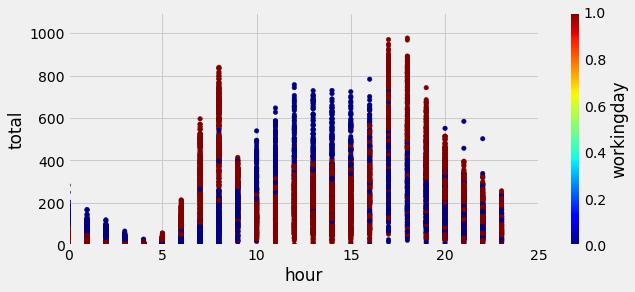

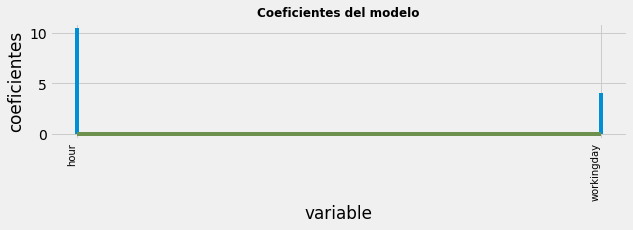

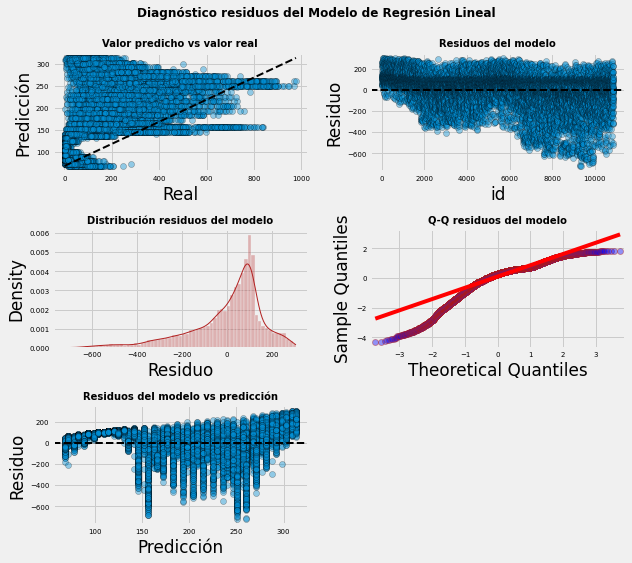

In [10]:
# Celda 3
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNetCV
import statsmodels.api as sm

# Configuración matplotlib
# ==============================================================================================
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
#style.use('ggplot') or plt.style.use('ggplot')

# Configuración warnings
# ===============================================================================================
import warnings
warnings.filterwarnings('ignore')

# Datos
# ==============================================================================================
bikes_RL=bikes[['hour','workingday','total']]
features_bikes_RL=bikes_RL[['hour','workingday']]
#datos = datos.drop(columns = datos.columns[0])
#datos.info()

#Cómo se hace a todo el conjuento de datos
X_train=features_bikes_RL
y_train=bikes_RL['total']

X=X_train
y=y_train
# Gráfica del salario, años y hits
plt.style.use('fivethirtyeight')
bikes_RL.plot(kind='scatter', x='hour', y='total', c='workingday', colormap='jet', xlim=(0, 25), ylim=(-1, 1100),figsize=(9.4, 4))


# Creación y entrenamiento del modelo
# ==============================================================================
modelo1 = LinearRegression(normalize=True)
modelo1.fit(X = X_train, y = y_train)
mse_scores=(-cross_val_score(modelo1, X,y, cv=10, scoring='neg_mean_squared_error'))
y_predict1=modelo1.predict(X_train) 
MSE1=mean_squared_error(y_train, y_predict1)

print(" ")
print('\033[1m' +"Resultados del modelo de Regresión Lineal"+ '\033[0m')
print(" ")

print(f'MSE Modelo de Regresión Lineal:{MSE1}')
print(f'Media MSE Modelo de Regresión Lineal con CV:{mse_scores.mean()}')
print(f'Standart Deviation MSE:{mse_scores.std()}')
print(f'Media R2:{modelo1.score(X,y)}')
print(f'Coeficientes {modelo1.coef_}')
print(f'Intercepto {modelo1.intercept_}')



# Coeficientes del modelo
# ==============================================================================
df_coeficientes = pd.DataFrame(
                        {'predictor': X_train.columns,
                         'coef': modelo1.coef_.flatten()}
                  )

fig, ax = plt.subplots(figsize=(9.2, 2))
ax.stem(df_coeficientes.predictor, df_coeficientes.coef, markerfmt=' ')
plt.xticks(rotation=90, ha='right', size=10)
ax.set_xlabel('variable')
ax.set_ylabel('coeficientes')
ax.set_title('Coeficientes del modelo',fontweight ="bold",fontsize = 12);

#print('\033[1m' + modelo.coef_.flatten() + '\033[0m')
#]Los coeficientes 
print(" ")
print('Total = '+str(round(modelo1.coef_.flatten()[0],2))+'*hour + '+str(round(modelo1.coef_.flatten()[1],2))+'*workingday + '+str(round(modelo1.intercept_,2)))
print(" ")


# Calculo del MSE
#==============================================================================

# Creación del modelo utilizando matrices como en scikitlearn
# =========================================================================
X=X_train
y=y_train

X_train2, X_test2, y_train2, y_test2 = train_test_split(
                                        X,
                                        y.values.reshape(-1,1),
                                        train_size   = 0.9999999,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

# A la matriz de predictores se le tiene que añadir una columna de 1s para el intercept del modelo
X_train2 = sm.add_constant(X_train2, prepend=True)
modelo2 = sm.OLS(endog=y_train2, exog=X_train2,)
modelo2 = modelo2.fit()
print(modelo2.summary())

# Gráficos
# ==============================================================================

# Diagnóstico errores (residuos) de las predicciones de entrenamiento
# ==============================================================================
prediccion_train=y_predict1
residuos_train   = prediccion_train - y_train


fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(9, 8))

axes[0, 0].scatter(y_train, prediccion_train, edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 0].plot([y_train.min(), y_train.max()], [prediccion_train.min(), prediccion_train.max()],
                'k--', color = 'black', lw=2)
axes[0, 0].set_title('Valor predicho vs valor real', fontsize = 10, fontweight = "bold")
axes[0, 0].set_xlabel('Real')
axes[0, 0].set_ylabel('Predicción')
axes[0, 0].tick_params(labelsize = 7)

axes[0, 1].scatter(list(range(len(y_train))), residuos_train,
                   edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 1].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[0, 1].set_title('Residuos del modelo', fontsize = 10, fontweight = "bold")
axes[0, 1].set_xlabel('id')
axes[0, 1].set_ylabel('Residuo')
axes[0, 1].tick_params(labelsize = 7)

sns.histplot(
    data    = residuos_train,
    stat    = "density",
    kde     = True,
    line_kws= {'linewidth': 1},
    color   = "firebrick",
    alpha   = 0.3,
    ax      = axes[1, 0]
)

axes[1, 0].set_title('Distribución residuos del modelo', fontsize = 10,
                     fontweight = "bold")
axes[1, 0].set_xlabel("Residuo")
axes[1, 0].tick_params(labelsize = 7)


sm.qqplot(
    residuos_train,
    fit   = True,
    line  = 'q',
    ax    = axes[1, 1], 
    color = 'firebrick',
    alpha = 0.4,
    lw    = 2
)
axes[1, 1].set_title('Q-Q residuos del modelo', fontsize = 10, fontweight = "bold")
axes[1, 1].tick_params(labelsize = 7)

axes[2, 0].scatter(prediccion_train, residuos_train,
                   edgecolors=(0, 0, 0), alpha = 0.4)
axes[2, 0].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[2, 0].set_title('Residuos del modelo vs predicción', fontsize = 10, fontweight = "bold")
axes[2, 0].set_xlabel('Predicción')
axes[2, 0].set_ylabel('Residuo')
axes[2, 0].tick_params(labelsize = 7)

# Se eliminan los axes vacíos
fig.delaxes(axes[2,1])

fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Diagnóstico residuos del Modelo de Regresión Lineal', fontsize = 12, fontweight = "bold");

### Análisis punto 3
Según los coeficientes resultamtes del modelo de regresión lineal por cada hora que transcurre se rentan 10.4922 bicicletas y si el día es laboral se rentan 4.07, sin embargo, las gráficas del comportamiento de renta de bicicletas durante las horas del día, es diferente, y requiere un mayor nivel de flexibilidad, por otra, parte teniendo en cuenta que la variable workingday es discreta, cuando el día es no laboral, la regresión lineal, descarta dicha variable del modelo,lo que genera una pérdida de información importante para el modelo.
Su valor predictivo es muy bajo con un R2 de 0.16, en las gráficas anteriores se puede ver que no hay una relación fácilmente de identificar entre los valores reales y los de la predicción.

### Punto 4 - Árbol de decisión manual
En la celda 4 cree un árbol de decisiones para pronosticar la variable "total" iterando **manualmente** sobre las variables "hour" y  "workingday". El árbol debe tener al menos 6 nodos finales.

In [11]:
# Celda 4
# Selección de variables predictoras
#====================================================================================================
features_numericas2 = [x for x in bikes.columns if x not in features_categoricas]
features=bikes[features_numericas2]

features=features.drop(columns = ['total'], errors = "ignore").head()
features_cols=features.columns

# Descripción de la variable de respuesta 'Salary'
#====================================================================================================
print(bikes.total.describe())

# Separación de variables predictoras (X) y variable de interes (y)
#====================================================================================================
#Cómo se hace a todo el conjuento de datos
X_train=features_bikes_RL
y_train=bikes_RL['total']

X = X_train
y = y_train
# Definición de parámetros y criterios de parada
#====================================================================================================
max_depth = None
num_pct = 10
max_features = None
min_gain=0.001


### Ejemplo: para la primera variable ('hour') se calculan los posibles puntos de corte y el gini index de un punto especifico
# Impresión variable a usar (hour)
j = 1
print(X.columns[j])
# División de la variable hour en num_ctp puntos (parámetro definido anteriormente) para obtener posibles puntos de corte
splits = np.percentile(X.iloc[:, j], np.arange(0, 100, 100.0 / num_pct).tolist())
splits = np.unique(splits)
print(splits)

# División de las observaciones usando el punto de corte en la posición 5 de la lista de splits
k=1
filter_l = X.iloc[:, j] < splits[k]

# División de la variable de respuesta de acuerdo a si la observación cumple o no con la regla binaria
# y_l: la observación tiene un valor menor al punto de corte seleccionado
# y_r: la observación tiene un valor mayor o igual al punto de corte seleccionado
y_l = y.loc[filter_l]
y_r = y.loc[~filter_l]

# Definición de la función que calcula el gini index
def gini(y):
    if y.shape[0] == 0:
        return 0
    else:
        return 1 - (y.mean()**2 + (1 - y.mean())**2)
    
# Gini index de las observaciones que tienen un valor menor al punto de corte seleccionado
gini_l = gini(y_l)
gini_l    

# Definición de la función gini_imputiry para calular la ganancia de una variable predictora j dado el punto de corte k
def gini_impurity(X_col, y, split):
    
    filter_l = X_col < split
    y_l = y.loc[filter_l]
    y_r = y.loc[~filter_l]
    
    n_l = y_l.shape[0]
    n_r = y_r.shape[0]
    
    gini_y = gini(y)
    gini_l = gini(y_l)
    gini_r = gini(y_r)
    
    gini_impurity_ = gini_y - (n_l / (n_l + n_r) * gini_l + n_r / (n_l + n_r) * gini_r)
    
    return gini_impurity_

# Ganancia de la variable 'Hits' en el punto de corte selecionado
gini_impurity(X.iloc[:, j], y, splits[k])


# Definición de la función best_split para calcular cuál es la mejor variable y punto de cortepara hacer la bifurcación del árbol
def best_split(X, y, num_pct=10):
    
    features = range(X.shape[1])
    
    best_split = [0, 0, 0]  # j, split, gain
    
    # Para todas las varibles 
    for j in features:
        
        splits = np.percentile(X.iloc[:, j], np.arange(0, 100, 100.0 / (num_pct+1)).tolist())
        splits = np.unique(splits)[1:]
        
        # Para cada partición
        for split in splits:
            gain = gini_impurity(X.iloc[:, j], y, split)
                        
            if gain > best_split[2]:
                best_split = [j, split, gain]
    
    return best_split


# Obtención de la variable 'j', su punto de corte 'split' y su ganancia 'gain'
j, split, gain = best_split(X, y, 5)
j, split, gain

# División de las observaciones usando la mejor variable 'j' y su punto de corte 'split'
filter_l = X.iloc[:, j] < split

y_l = y.loc[filter_l]
y_r = y.loc[~filter_l]

y.shape[0], y_l.shape[0], y_r.shape[0]

y.mean(), y_l.mean(), y_r.mean()

# Definición de la función tree_grow para hacer un crecimiento recursivo del árbol
def tree_grow(X, y, level=0, min_gain=0.001, max_depth=None, num_pct=10):
    
    # Si solo es una observación
    if X.shape[0] == 1:
        tree = dict(y_pred=y.iloc[:1].values[0], y_prob=0.5, level=level, split=-1, n_samples=1, gain=0)
        return tree
    
    # Calcular la mejor división
    j, split, gain = best_split(X, y, num_pct)
    
    # Guardar el árbol y estimar la predicción
    y_pred = int(y.mean() >= 0.5) 
    y_prob = (y.sum() + 1.0) / (y.shape[0] + 2.0)  # Corrección Laplace 
    
    tree = dict(y_pred=y_pred, y_prob=y_prob, level=level, split=-1, n_samples=X.shape[0], gain=gain)
    # Revisar el criterio de parada 
    if gain < min_gain:
        return tree
    if max_depth is not None:
        if level >= max_depth:
            return tree   
    
    # Continuar creando la partición
    filter_l = X.iloc[:, j] < split
    X_l, y_l = X.loc[filter_l], y.loc[filter_l]
    X_r, y_r = X.loc[~filter_l], y.loc[~filter_l]
    tree['split'] = [j, split]

    # Siguiente iteración para cada partición
    
    tree['sl'] = tree_grow(X_l, y_l, level + 1, min_gain=min_gain, max_depth=max_depth, num_pct=num_pct)
    tree['sr'] = tree_grow(X_r, y_r, level + 1, min_gain=min_gain, max_depth=max_depth, num_pct=num_pct)
    
    return tree

# Aplicación de la función tree_grow
tree_grow(X, y, level=0, min_gain=0.001, max_depth=6, num_pct=10)


count    10886.000000
mean       191.574132
std        181.144454
min          1.000000
25%         42.000000
50%        145.000000
75%        284.000000
max        977.000000
Name: total, dtype: float64
workingday
[0. 1.]


{'y_pred': 1,
 'y_prob': 191.53903379867745,
 'level': 0,
 'split': [0, 8.0],
 'n_samples': 10886,
 'gain': 18268.811823533004,
 'sl': {'y_pred': 1,
  'y_prob': 55.40711902113459,
  'level': 1,
  'split': [0, 7.0],
  'n_samples': 3594,
  'gain': 7207.700659959655,
  'sl': {'y_pred': 1,
   'y_prob': 32.561604584527224,
   'level': 2,
   'split': [0, 6.0],
   'n_samples': 3139,
   'gain': 646.8008927589567,
   'sl': {'y_pred': 1,
    'y_prob': 25.15934475055845,
    'level': 3,
    'split': [0, 2.0],
    'n_samples': 2684,
    'gain': 382.8088308604629,
    'sl': {'y_pred': 1,
     'y_prob': 44.41383095499451,
     'level': 4,
     'split': [1, 1.0],
     'n_samples': 909,
     'gain': 1402.5704281636313,
     'sl': {'y_pred': 1,
      'y_prob': 82.63356164383562,
      'level': 5,
      'split': [0, 1.0],
      'n_samples': 290,
      'gain': 254.91262782401645,
      'sl': {'y_pred': 1,
       'y_prob': 93.21088435374149,
       'level': 6,
       'split': -1,
       'n_samples': 145,


### Punto 5 - Árbol de decisión con librería
En la celda 5 entrene un árbol de decisiones con la **librería sklearn**, usando las variables predictoras "hour" y "workingday" y calibre los parámetros que considere conveniente para obtener un mejor desempeño. Comente el desempeño del modelo con alguna métrica de desempeño de modelos de clasificación y compare desempeño con el modelo del punto 3.

 
Resultados del Arbol de Regresión con la librería sklearn
 
Profundidad del mejor Árbol de Regresión: 10
MSE del mejor Árbol de Regresión: 13143.12
 
      feature  importance
1  workingday     0.18495
0        hour     0.81505


count    10.000000
mean     -0.244711
std       2.772439
min      -8.117113
25%       0.553167
50%       0.589719
75%       0.753056
max       0.900386
dtype: float64

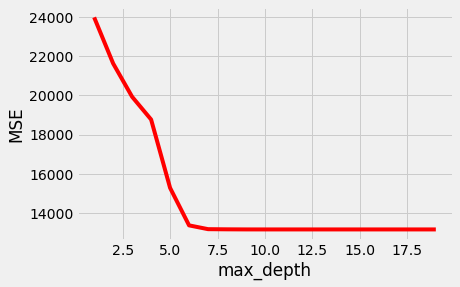

In [12]:
# Celda 5
# Lista de valores para calibrar el criterio de parada de máxima profundidad (max_depth)
X=features_bikes_RL
y=bikes_RL['total']

max_depth_range = range(1, 20)

# Lista para guardar los valores del RMSE para cada valor de máxima profundidad (max_depth)
mse_scores = []

# Importación de modelos de sklearn 
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor

# Loop para obtener el desempeño del modelo de acuerdo con la máxima profundidad
for depth in max_depth_range:
    # Definición del árbol de decisión usando DecisionTreeRegressor de la libreria sklearn
    clf = DecisionTreeRegressor(max_depth=depth, random_state=1)
    mse_scores.append(-1*(cross_val_score(clf, X, y, cv=10, scoring='neg_mean_squared_error').mean()))
    
# Gráficas max_depth versus MSE 
#====================================================================================================

plt.plot(max_depth_range, mse_scores,color="red")
plt.xlabel('max_depth')
plt.ylabel('MSE')

# Obteniendo la evaluacion del desempeno de este arbol final con 10 niveles de profundidad 
#====================================================================================================
best_tree=sorted(zip(mse_scores, max_depth_range))[::1][0]
best_tree[1]

reg_best= DecisionTreeRegressor(max_depth=best_tree[1],random_state=1)
reg_best.fit(X,y)

print(" ")
print('\033[1m' +"Resultados del Arbol de Regresión con la librería sklearn"+ '\033[0m')
print(" ")
print(f'Profundidad del mejor Árbol de Regresión: {round(best_tree[1],2)}')
print(f'MSE del mejor Árbol de Regresión: {round(best_tree[0],2)}')
print(" ")

# Importancia de las variables
#====================================================================================================
print(pd.DataFrame({'feature':X.columns, 'importance':reg_best.feature_importances_}).sort_values('importance')    )


# Impresión de resultados de desemepeño del árbol de decisión
#====================================================================================================
pd.Series(cross_val_score(reg_best, X, y, cv=10)).describe()

### Análisis punto 5

El MSE que se obtiene con el árbol de decisión (13143) es mucho menor que el obtenido con la regresión lineal (27541), esto debido a que por ser un modelo no lineal es más fñexible para este tipo varibles de estudio. Con los resultados de importancia de las variables, también se observa que la variable más importante es la hora (0.81505) y no workingday (0.18495)


## Parte B - Métodos de ensamblajes
En esta parte del taller se usará el conjunto de datos de Popularidad de Noticias Online. El objetivo es predecir si la notica es popular o no, la populridad esta dada por la cantidad de reacciones en redes sociales. Para más detalles puede visitar el sigueinte enlace: [datos](https://archive.ics.uci.edu/ml/datasets/online+news+popularity).

### Datos popularidad de noticias

In [13]:
# Lectura de la información de archivo .csv
df = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/mashable.csv', index_col=0)
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,Popular
0,http://mashable.com/2014/12/10/cia-torture-rep...,28.0,9.0,188.0,0.732620,1.0,0.844262,5.0,1.0,1.0,...,0.200000,0.80,-0.487500,-0.60,-0.250000,0.9,0.8,0.4,0.8,1
1,http://mashable.com/2013/10/18/bitlock-kicksta...,447.0,7.0,297.0,0.653199,1.0,0.815789,9.0,4.0,1.0,...,0.160000,0.50,-0.135340,-0.40,-0.050000,0.1,-0.1,0.4,0.1,0
2,http://mashable.com/2013/07/24/google-glass-po...,533.0,11.0,181.0,0.660377,1.0,0.775701,4.0,3.0,1.0,...,0.136364,1.00,0.000000,0.00,0.000000,0.3,1.0,0.2,1.0,0
3,http://mashable.com/2013/11/21/these-are-the-m...,413.0,12.0,781.0,0.497409,1.0,0.677350,10.0,3.0,1.0,...,0.100000,1.00,-0.195701,-0.40,-0.071429,0.0,0.0,0.5,0.0,0
4,http://mashable.com/2014/02/11/parking-ticket-...,331.0,8.0,177.0,0.685714,1.0,0.830357,3.0,2.0,1.0,...,0.100000,0.55,-0.175000,-0.25,-0.100000,0.0,0.0,0.5,0.0,0


In [14]:
# Definición variable de interes y variables predictoras
X = df.drop(['url', 'Popular'], axis=1)
y = df['Popular']
y.mean()

0.5

In [15]:
# División de la muestra en set de entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

### Punto 6 - Árbol de decisión y regresión logística
En la celda 6 construya un árbol de decisión y una regresión logística. Para el árbol calibre al menos un parámetro y evalúe el desempeño de cada modelo usando las métricas de Accuracy y F1-Score.

In [16]:
# Celda 6
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, accuracy_score

# Árbol de decisión
#====================================================================================================
# Lista de valores para calibrar el criterio de parada de máxima profundidad (max_depth)
max_depth_range = range(1, 21)

# Lista para guardar los valores del accuracy para cada valor de máxima profundidad (max_depth)
accuracy_scores = []

# Importación de modelos de sklearn 
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

# Loop para obtener el desempeño del modelo de acuerdo con la máxima profundidad
for depth in max_depth_range:
    # Definición del árbol de decisión usando DecisionTreeClassifier de la libreria sklearn
    clf = DecisionTreeClassifier(max_depth=depth, random_state=1)
    accuracy_scores.append(cross_val_score(clf, X, y, cv=10, scoring='accuracy').mean())

# Mejor accuracy (desempeño del modelo) y su correspondiente max_depth
best_tree_params=sorted(zip(accuracy_scores, max_depth_range))[::-1][0]
best_tree_depth=best_tree_params[1]

best_tree= DecisionTreeClassifier(max_depth=best_tree_depth,random_state=101)
best_tree.fit(X_train,y_train)
y_predict_tree= best_tree.predict(X_test)

print(" ")
print('\033[1m' +"Resultados del Arbol de Decisión"+ '\033[0m')
print(" ")
print(f'f1 Árbol de Decisión:{round(f1_score(y_test , y_predict_tree),3)}')
print(f'Accuracy Árbol de Decisión:{round(accuracy_score(y_test , y_predict_tree),3)}')


# Regresión Logística
#====================================================================================================
log_regression= LogisticRegression()
log_regression.fit(X_train,y_train)
y_predict_reg= log_regression.predict(X_test)

print(" ")
print('\033[1m' +"Resultados del modelo de Regresión Logística"+ '\033[0m')
print(" ")
print(f'f1 Regresión Logística:{round(f1_score(y_test , y_predict_reg),3)}')
print(f'Accuracy Regresión Logística:{round(accuracy_score(y_test , y_predict_reg),3)}')




 
Resultados del Arbol de Decisión
 
f1 Árbol de Decisión:0.645
Accuracy Árbol de Decisión:0.645
 
Resultados del modelo de Regresión Logística
 
f1 Regresión Logística:0.611
Accuracy Regresión Logística:0.614


### Punto 7 - Votación Mayoritaria
En la celda 7 elabore un esamble con la metodología de **Votación mayoritaria** compuesto por 300 muestras bagged para cada uno de los siguientes escenarios:

-100 árboles de decisión donde max_depth = None\
-100 árboles de decisión donde max_depth = 2\
-100 regresiones logísticas

Evalúe los modelos utilizando las métricas de Accuracy y F1-Score.

In [17]:
# Celda 7

import sklearn.metrics as metrics
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsRegressor


# Caso 1: Metodología de Votación mayoritaria compuesto por 300 muestras bagged para 100 árboles de decisión donde max_depth = None
#========================================================================================================
clf_VM1 = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth = None),max_samples=300, n_estimators=100, bootstrap=True,
                        random_state=42, n_jobs=-1, oob_score=True)
# Predicción y desempeño al hacer votación mayoritaria
clf_VM1.fit(X_train, y_train)
y_pred_VM1 = clf_VM1.predict(X_test)
resultado_1=metrics.f1_score(y_pred_VM1,y_test ), metrics.accuracy_score(y_pred_VM1, y_test)
print('Caso 1: [f1 , Accuracy] = '+str(resultado_1))

# Caso 2: Metodología de Votación mayoritaria compuesto por 300 muestras bagged para 100 árboles de decisión donde max_depth = 2
#========================================================================================================
clf_VM2 = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth = 2),max_samples=300, n_estimators=100, bootstrap=True,
                        random_state=42, n_jobs=-1, oob_score=True)
# Predicción y desempeño al hacer votación mayoritaria
clf_VM2.fit(X_train, y_train)
y_pred_VM2 = clf_VM2.predict(X_test)
resultado_2=metrics.f1_score(y_pred_VM2,y_test), metrics.accuracy_score(y_pred_VM2, y_test)
print('Caso 2: [f1 , Accuracy] = '+str(resultado_2))


# Caso 3: Metodología de Votación mayoritaria compuesto por 300 muestras bagged para 100 regresiones logísticas
#========================================================================================================
clf_LR = BaggingClassifier(base_estimator=LogisticRegression(),max_samples=300, n_estimators=100, bootstrap=True,
                        random_state=42, n_jobs=-1, oob_score=True)
# Predicción y desempeño al hacer votación mayoritaria
clf_LR.fit(X_train, y_train)
y_pred_LR = clf_LR.predict(X_test)
resultado_3=metrics.f1_score(y_pred_LR,y_test), metrics.accuracy_score(y_pred_LR, y_test)
print('Caso 3: [f1 , Accuracy] = '+str(resultado_3))


Caso 1: [f1 , Accuracy] = (0.6567567567567568, 0.6613333333333333)
Caso 2: [f1 , Accuracy] = (0.631578947368421, 0.6453333333333333)
Caso 3: [f1 , Accuracy] = (0.6138211382113822, 0.62)


### Punto 8 - Votación Ponderada
En la celda 8 elabore un ensamble con la metodología de **Votación ponderada** compuesto por 300 muestras bagged para los mismos tres escenarios del punto 7. Evalúe los modelos utilizando las métricas de Accuracy y F1-Score

In [18]:
# Celda 8
# Caso 1: Metodología de Votación Ponderada compuesto por 300 muestras bagged para 100 árboles de decisión donde max_depth = None
#========================================================================================================
clf_VM1 = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth = None),max_samples=300, n_estimators=100, bootstrap=True,
                        random_state=42, n_jobs=-1, oob_score=True)
# Predicción y desempeño al hacer votación mayoritaria
clf_VM1.fit(X_train, y_train)
y_pred_VM1 = clf_VM1.predict(X_test)
resultado_1=metrics.f1_score(y_pred_VM1,y_test ), metrics.accuracy_score(y_pred_VM1, y_test)
print('Caso 1 Votación Mayoritaria: [f1 , Accuracy] = '+str(resultado_1))

# Obtención de los pesos alpha de cada modelo de acuerdo al error OOB
errors = np.zeros(clf_VM1.n_estimators)
y_pred_all_VM1 = np.zeros((X_test.shape[0], clf_VM1.n_estimators))

for i in range(clf_VM1.n_estimators):
    oob_sample_VM1 = ~clf_VM1.estimators_samples_[i]
    y_pred_VM1 = clf_VM1.estimators_[i].predict(X_train.values[oob_sample_VM1])
    errors[i] = metrics.accuracy_score(y_pred_VM1, y_train.values[oob_sample_VM1])
    y_pred_all_VM1[:, i] = clf_VM1.estimators_[i].predict(X_test)
    
alpha = (1 - errors) / (1 - errors).sum()
y_pred_1 = (np.sum(y_pred_all_VM1 * alpha, axis=1) >= 0.5).astype(np.int)

# Desempeño al hacer votación ponderada
resultado_1_1=metrics.f1_score(y_pred_1, y_test), metrics.accuracy_score(y_pred_1, y_test)
print('Caso 1 Votación Ponderada: [f1 , Accuracy] = '+str(resultado_1_1))

# Caso 2: Metodología de Votación Ponderada compuesto por 300 muestras bagged para 100 árboles de decisión donde max_depth = 2
#========================================================================================================
clf_VM2 = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth = 2),max_samples=300, n_estimators=100, bootstrap=True,
                        random_state=42, n_jobs=-1, oob_score=True)
# Predicción y desempeño al hacer votación mayoritaria
clf_VM2.fit(X_train, y_train)
y_pred_VM2 = clf_VM2.predict(X_test)
resultado_2=metrics.f1_score(y_pred_VM2,y_test), metrics.accuracy_score(y_pred_VM2, y_test)
print('Caso 2 Votación Mayoritaria: [f1 , Accuracy] = '+str(resultado_2))

# Obtención de los pesos alpha de cada modelo de acuerdo al error OOB
errors = np.zeros(clf_VM2.n_estimators)
y_pred_all_VM2 = np.zeros((X_test.shape[0], clf_VM2.n_estimators))

for i in range(clf_VM2.n_estimators):
    oob_sample_VM2 = ~clf_VM2.estimators_samples_[i]
    y_pred_VM2 = clf_VM2.estimators_[i].predict(X_train.values[oob_sample_VM2])
    errors[i] = metrics.accuracy_score(y_pred_VM2, y_train.values[oob_sample_VM2])
    y_pred_all_VM2[:, i] = clf_VM2.estimators_[i].predict(X_test)
    
alpha = (1 - errors) / (1 - errors).sum()
y_pred_2 = (np.sum(y_pred_all_VM2 * alpha, axis=1) >= 0.5).astype(np.int)

# Desempeño al hacer votación ponderada
resultado_2_1=metrics.f1_score(y_pred_2, y_test), metrics.accuracy_score(y_pred_2, y_test)
print('Caso 2 Votación Ponderada: [f1 , Accuracy] = '+str(resultado_2_1))


# Caso 3: Metodología de Votación Ponderada compuesto por 300 muestras bagged para 100 regresiones logísticas
#========================================================================================================
clf_LR = BaggingClassifier(base_estimator=LogisticRegression(),max_samples=300, n_estimators=100, bootstrap=True,
                        random_state=42, n_jobs=-1, oob_score=True)
# Predicción y desempeño al hacer votación mayoritaria
clf_LR.fit(X_train, y_train)
y_pred_LR = clf_LR.predict(X_test)
resultado_3=metrics.f1_score(y_pred_LR,y_test), metrics.accuracy_score(y_pred_LR, y_test)
print('Caso 3: [f1 , Accuracy] = '+str(resultado_3))

# Obtención de los pesos alpha de cada modelo de acuerdo al error OOB
errors = np.zeros(clf_VM2.n_estimators)
y_pred_all_LR = np.zeros((X_test.shape[0], clf_VM2.n_estimators))

for i in range(clf_LR.n_estimators):
    oob_sample_LR = ~clf_LR.estimators_samples_[i]
    y_pred_LR = clf_LR.estimators_[i].predict(X_train.values[oob_sample_LR])
    errors[i] = metrics.accuracy_score(y_pred_LR, y_train.values[oob_sample_LR])
    y_pred_all_LR[:, i] = clf_LR.estimators_[i].predict(X_test)
    
alpha = (1 - errors) / (1 - errors).sum()
y_pred_LR = (np.sum(y_pred_all_LR * alpha, axis=1) >= 0.5).astype(np.int)

# Desempeño al hacer votación ponderada
resultado_LR=metrics.f1_score(y_pred_LR, y_test), metrics.accuracy_score(y_pred_LR, y_test)
print('Caso 3 Votación Ponderada: [f1 , Accuracy] = '+str(resultado_LR))




Caso 1 Votación Mayoritaria: [f1 , Accuracy] = (0.6567567567567568, 0.6613333333333333)
Caso 1 Votación Ponderada: [f1 , Accuracy] = (0.6631087391594397, 0.6633333333333333)
Caso 2 Votación Mayoritaria: [f1 , Accuracy] = (0.631578947368421, 0.6453333333333333)
Caso 2 Votación Ponderada: [f1 , Accuracy] = (0.6324549237170597, 0.6466666666666666)
Caso 3: [f1 , Accuracy] = (0.6138211382113822, 0.62)
Caso 3 Votación Ponderada: [f1 , Accuracy] = (0.6168350168350168, 0.6206666666666667)


### Punto 9 - Comparación y análisis de resultados
En la celda 9 comente sobre los resultados obtenidos con las metodologías usadas en los puntos 7 y 8, compare los resultados y enuncie posibles ventajas o desventajas de cada una de ellas.

### Analisis Punto 9
***
No se observa una gran diferencia en el desempeño de los modelos calculados  mediante la votación Mayoritaria y Ponderada, comparando el f1 y el Accuracy, sin embargo, en los tres casos hay una leve mejoria en el desempeño mediante la votación ponderada.

La votación mayoritaria tiene un menor costo computacional, por lo cual para una mayor cantidad de datos podría considerarse no utilizar la ponderada ya que para este problema en particular no hay una mejora significativa entre las dos metodologías.

El modelo cn pero desempeño es el de Regresión logistica, sin embargo, su evaluación no está muy lejos de los valores de los otros dos casos.


